In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folder_path = '/data/home/meiri.yoav/biomed_proj/data/mimic_perform_af_wfdb/'

record_names = []
for file in os.listdir(folder_path):
    if file.endswith('.hea'):  # we find only the .hea files.
        record_names.append(file[:-4])  # we remove the extensions, keeping only the number itself.
print(record_names[:15])
print(f'Number of records: {len(record_names)}')

['mimic_perform_af_017', 'mimic_perform_af_013', 'mimic_perform_af_018', 'mimic_perform_af_014', 'mimic_perform_af_012', 'mimic_perform_af_001', 'mimic_perform_af_011', 'mimic_perform_af_004', 'mimic_perform_af_016', 'mimic_perform_af_005', 'mimic_perform_af_007', 'mimic_perform_af_003', 'mimic_perform_af_002', 'mimic_perform_af_019', 'mimic_perform_af_010']
Number of records: 19


In [19]:
import wfdb

file_name = folder_path + 'mimic_perform_af_007'  # path of an aribrary file, notice that we do not include the extension (.dat or .hea)

record = wfdb.rdrecord(file_name)
print(record.__dict__)

{'record_name': 'mimic_perform_af_007', 'n_sig': 2, 'fs': 125, 'counter_freq': None, 'base_counter': None, 'sig_len': 150001, 'base_time': None, 'base_date': None, 'comments': ['<Original Subject ID>: p050089 <Original Recording ID>: p050089-2157-08-23-16-37 <Original File>: 3592210_0002; 3592210_0002; 3592210_0002; 3592210_0002 <subject group>:'], 'sig_name': ['PPG, Fingertip PPG recorded using bedside monitor', 'ECG, ECG recorded using bedside monitor, lead III'], 'p_signal': array([[0.52941081, 0.73228539],
       [0.52156791, 0.74802957],
       [0.51372501, 0.74015748],
       ...,
       [0.46666762, 0.78740133],
       [0.46666762, 0.79527343],
       [0.46666762, 0.80314552]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['mimic_perform_af_007.dat', 'mimic_perform_af_007.dat'], 'fmt': ['16', '16'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [65792.0079, 88540.617], 'baseline': [-33025, -88541], 'units': [

In [22]:
import wfdb

file_name = folder_path + 'mimic_perform_af_003'  # path of an aribrary file, notice that we do not include the extension (.dat or .hea)

record = wfdb.rdrecord(file_name)
print(record.__dict__)

{'record_name': 'mimic_perform_af_003', 'n_sig': 3, 'fs': 125, 'counter_freq': None, 'base_counter': None, 'sig_len': 150001, 'base_time': None, 'base_date': None, 'comments': ['<Original Subject ID>: p022954 <Original Recording ID>: p022954-2136-02-29-17-52 <Original File>: 3658326_0001 <subject group>:'], 'sig_name': ['PPG, Fingertip PPG recorded using bedside monitor', 'ECG, ECG recorded using bedside monitor, lead II', 'resp, Impedance pneumography respiratory signal recorded at the chest using bedside monitor'], 'p_signal': array([[0.28347516, 0.79491746, 0.74681845],
       [0.28055232, 0.80469307, 0.74388867],
       [0.27956906, 0.81054851, 0.7399823 ],
       ...,
       [0.50049273, 0.66991869, 0.91788995],
       [0.52198975, 0.66015962, 0.93841365],
       [0.54154719, 0.6347695 , 0.9599292 ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['mimic_perform_af_003.dat', 'mimic_perform_af_003.dat', 'mimic_perform_af_003.dat'], 'fmt': ['16', '16', '16'

In [20]:
print(record.p_signal.shape)
print(f'{record.fs}Hz')

signals, fields = wfdb.rdsamp(file_name)
print(signals)
print(fields)

(150001, 2)
125Hz
[[0.52941081 0.73228539]
 [0.52156791 0.74802957]
 [0.51372501 0.74015748]
 ...
 [0.46666762 0.78740133]
 [0.46666762 0.79527343]
 [0.46666762 0.80314552]]
{'fs': 125, 'sig_len': 150001, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['NU', 'mV'], 'sig_name': ['PPG, Fingertip PPG recorded using bedside monitor', 'ECG, ECG recorded using bedside monitor, lead III'], 'comments': ['<Original Subject ID>: p050089 <Original Recording ID>: p050089-2157-08-23-16-37 <Original File>: 3592210_0002; 3592210_0002; 3592210_0002; 3592210_0002 <subject group>:']}


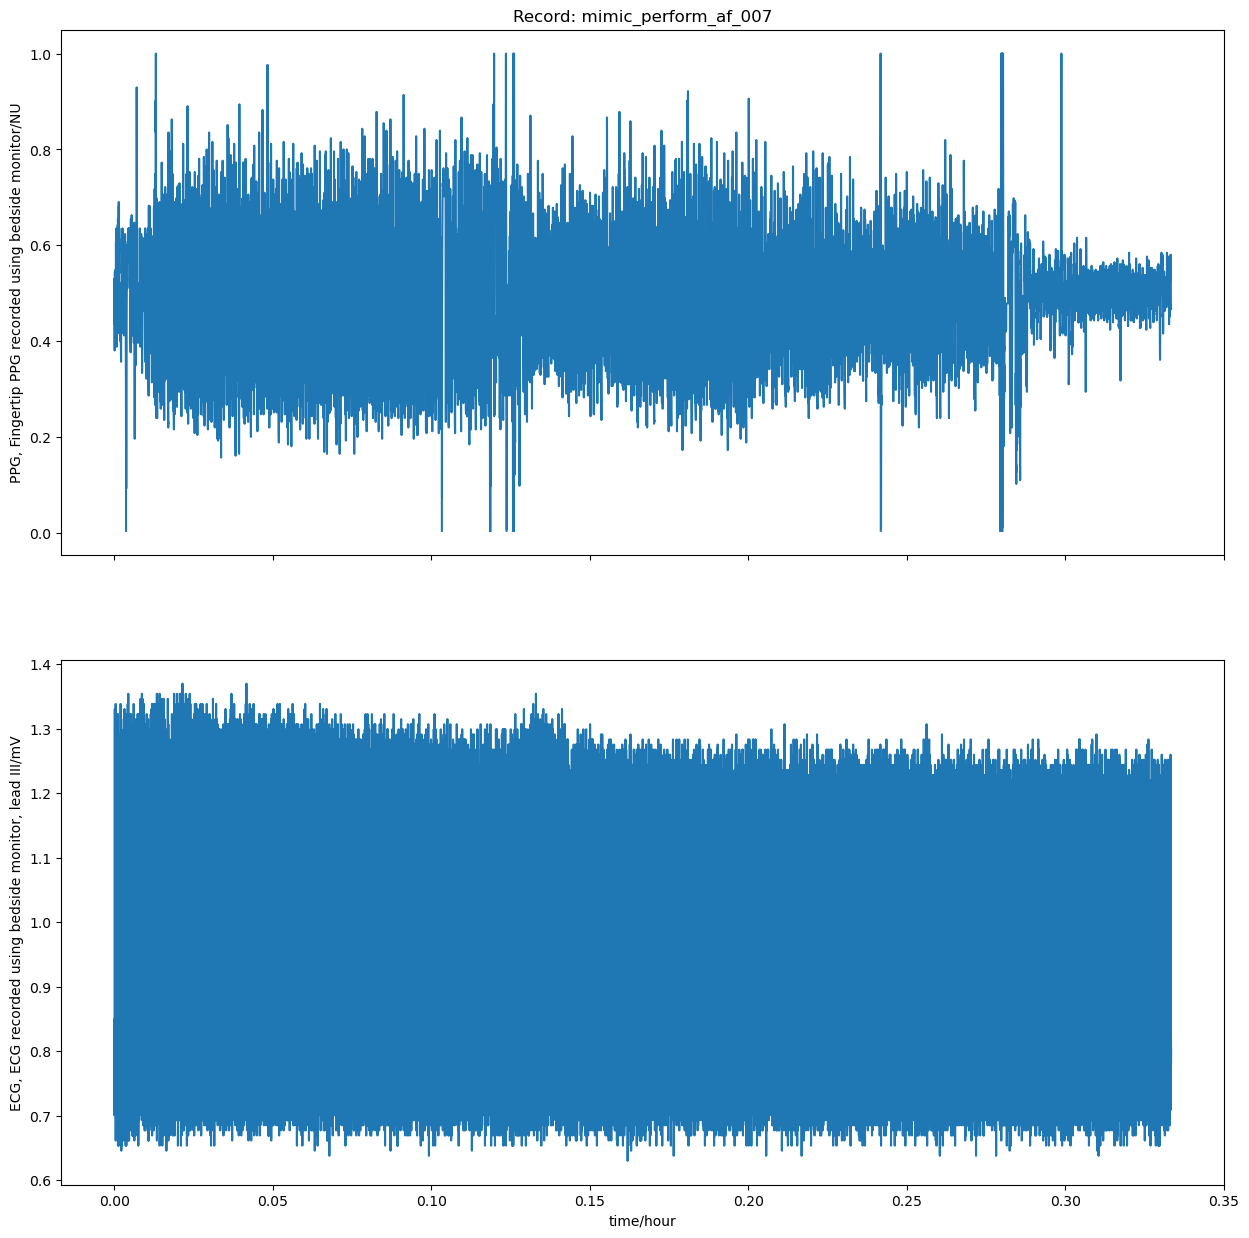

In [21]:
figsize=(15,15)

wfdb.plot_wfdb(record=record, time_units='hours', figsize=figsize)

In [ ]:
annotation = wfdb.rdann(file_name, 'atr')
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')
annotation.__dict__.keys()

In [15]:
from scipy.fft import fft, fftfreq

sampfrom=60000
sampto=65000

record_samples = wfdb.rdrecord(file_name, sampfrom=sampfrom, sampto=sampto, channels=[0])
signal = np.squeeze(record_samples.p_signal)
fs = record_samples.fs
#--------------Your code--------------#
# S should be the FFT.
# k should be the discrete sample frequencies.

k = fftfreq(len(signal), 1/fs)
S = fft(signal)
#-------------------------------------#

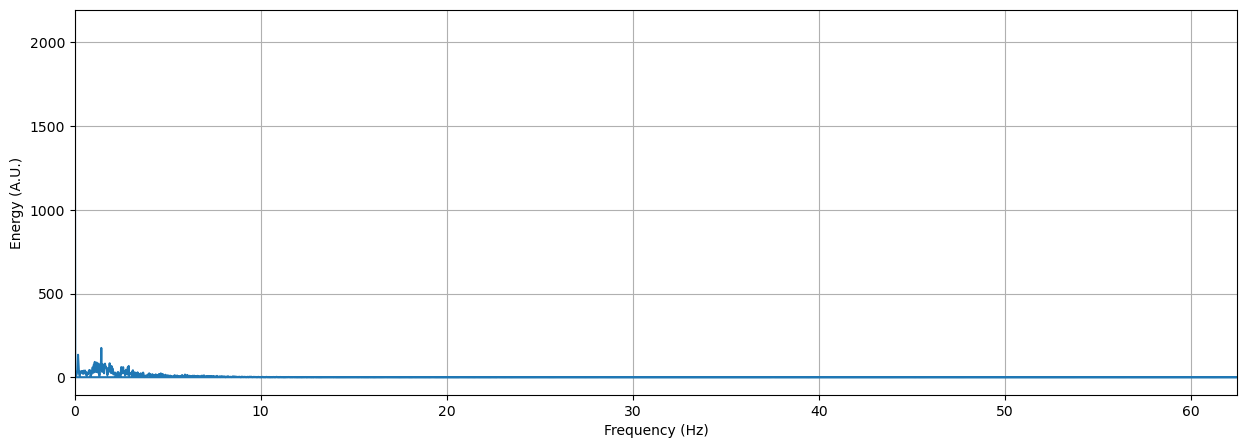

In [20]:
plt.figure(figsize=(15,5))
plt.plot(k, abs(S))
plt.xlim(0, fs/2)
plt.grid()
plt.ylabel('Energy (A.U.)')
plt.xlabel('Frequency (Hz)')
plt.show()

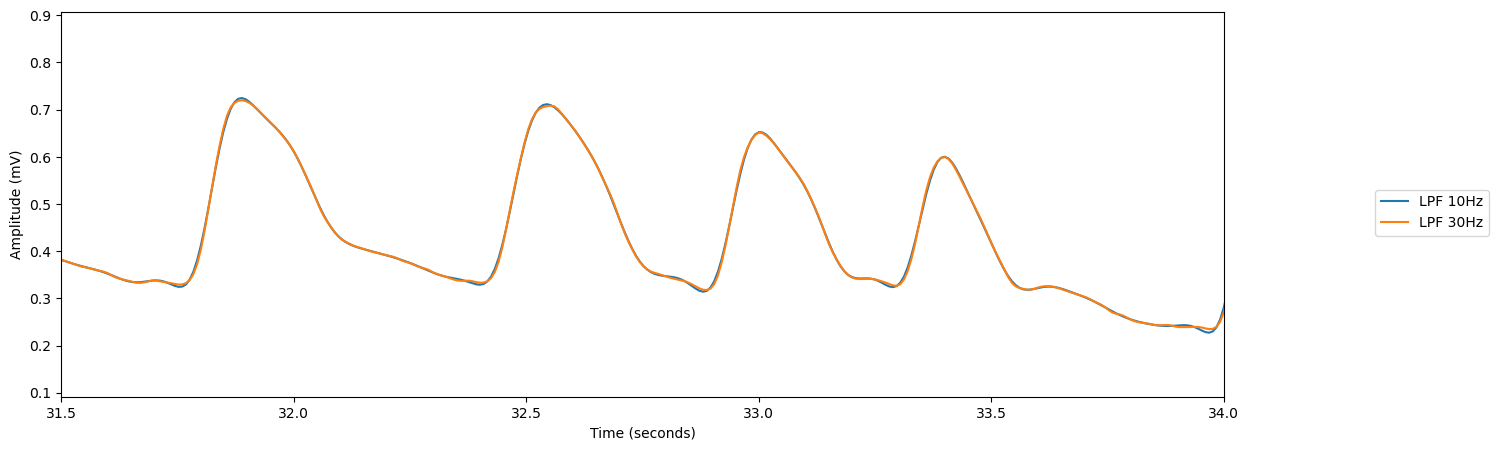

In [21]:
### from scipy.fft import ifft
from scipy.signal import butter, filtfilt  # Butterworth filter

#--------------Your code--------------#
# signal_LP10 and signal_LP30 should be the filtered signals.

b, a = butter(4, 10, 'low', fs=fs)
signal_LP10 = filtfilt(b, a, signal)  # Notice the zero-phase filtering

b, a = butter(4, 30, 'low', fs=fs)
signal_LP30 = filtfilt(b, a, signal)
#-------------------------------------#

plt.figure(figsize=(15,5))
t = np.linspace(0, (signal.shape[0]-1)/fs, signal.shape[0])
# plt.plot(t, signal, label='original')
plt.plot(t, signal_LP10, label='LPF 10Hz')
plt.plot(t, signal_LP30, label='LPF 30Hz')

plt.xlim(31.5,34)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.legend(bbox_to_anchor=(1.124, 0.4))
plt.show()